In [41]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
# Load the dataset
df = pd.read_csv('realtor-data.zip.csv')

In [59]:
df['prev_sold_date'] = df['prev_sold_date'].astype(str).str.strip()

# Convert 'prev_sold_date' to datetime
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

# Extract the year from 'prev_sold_date'
df['year_sold'] = df['prev_sold_date'].dt.year

# Filter data based on 'San Diego' and 'California'
filtered_df = df[(df['city'] == 'San Diego') & (df['state'] == 'California')]

# Ensure that the 'prev_sold_date' is not NaN
filtered_df = filtered_df[filtered_df['prev_sold_date'].notna()]
filtered_df = filtered_df[filtered_df['house_size'].notna()]
filtered_df = filtered_df[filtered_df['house_size'] > 0]
filtered_df = filtered_df[filtered_df['bed'].notna()]
filtered_df['price_per_sqft'] = filtered_df['price'] / filtered_df['house_size']


#cleaning for bed visualization
filtered_df = filtered_df[filtered_df['bed'].notna()]
# Ensure 'bed' column is numeric
filtered_df['bed'] = pd.to_numeric(filtered_df['bed'], errors='coerce')
# Drop rows where 'bed' is NaN or invalid after conversion
filtered_df = filtered_df[filtered_df['bed'].notna()]
# Group by number of bedrooms and calculate the average price per square foot
average_price_by_bedrooms = filtered_df.groupby('bed')['price_per_sqft'].mean().reset_index()
average_price_by_bedrooms.columns = ['Number of Bedrooms', 'Average Price per Sq Ft']

#cleaning for bathroom visualization
filtered_df = filtered_df[filtered_df['bath'].notna()]
# Ensure 'bed' column is numeric
filtered_df['bath'] = pd.to_numeric(filtered_df['bath'], errors='coerce')
# Drop rows where 'bed' is NaN or invalid after conversion
filtered_df = filtered_df[filtered_df['bath'].notna()]
# Group by number of bedrooms and calculate the average price per square foot
average_price_by_bedrooms = filtered_df.groupby('bath')['price_per_sqft'].mean().reset_index()

# Rename columns for clarity
average_price_by_bedrooms.columns = ['Number of Bathrooms', 'Average Price per Sq Ft']

# Save the filtered data with the new 'year_sold' column
filtered_df.to_csv('filtered_data.csv', index=False)

C:\Users\ahjbr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


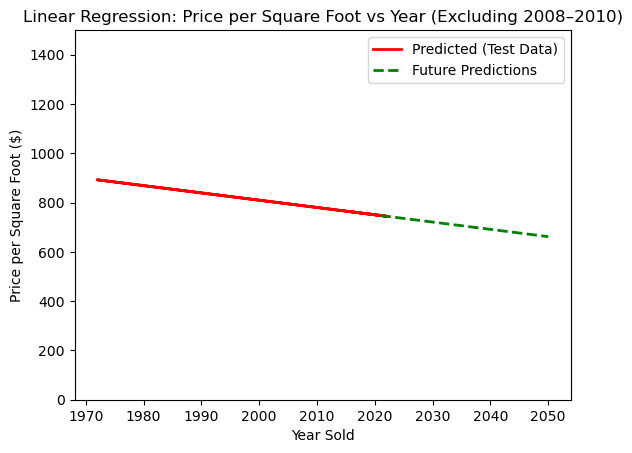

Mean Squared Error: 66911.87762410706
R² Score: -0.1627619707204302


In [47]:
noRecession = filtered_df[(filtered_df['year_sold'] < 2008) | (filtered_df['year_sold'] > 2010)]
X = noRecession[['year_sold']]
y = noRecession['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Predict future values (e.g., 2021–2030)
future_years = np.arange(2021, 2051).reshape(-1, 1)
future_prices = model.predict(future_years)

# Plot the results
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted (Test Data)')

# Plot future predictions
plt.plot(future_years, future_prices, color='green', linestyle='--', linewidth=2, label='Future Predictions')

plt.xlabel('Year Sold')
plt.ylabel('Price per Square Foot ($)')
plt.title('Linear Regression: Price per Square Foot vs Year (Excluding 2008–2010)')
plt.ylim(0, 1500)
plt.legend()
plt.show()

# Print the model's performance
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

C:\Users\ahjbr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ahjbr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


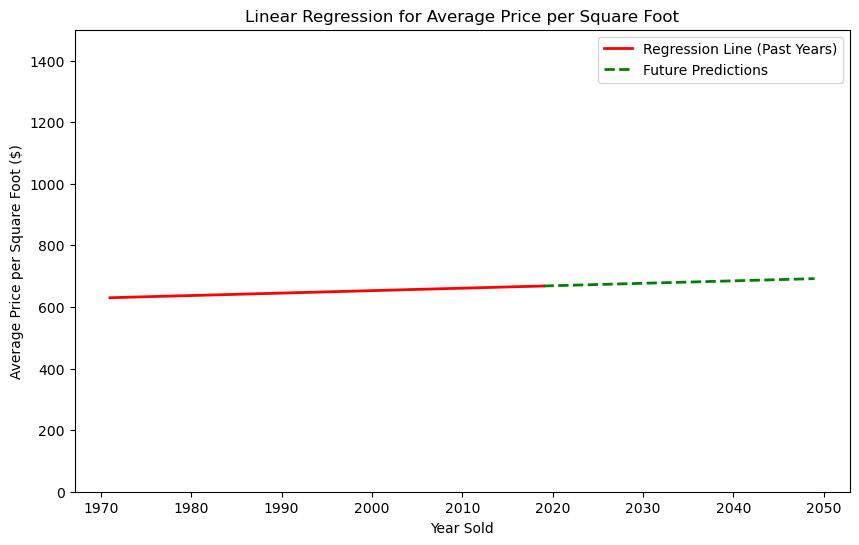

In [108]:
# Group data by year_sold and calculate the average price per square foot
average_price_by_year = filtered_df.groupby('year_sold')['price_per_sqft'].mean().reset_index()

# Define X (years) and y (average price per square foot)
X_years = average_price_by_year[['year_sold']]  # Must be 2D for LinearRegression
y_price_sqft = average_price_by_year['price_per_sqft']

# Initialize and train the Linear Regression model
model_year = LinearRegression()
model_year.fit(X_years, y_price_sqft)

# Get predictions for the historical range
year_range = np.arange(average_price_by_year['year_sold'].min(), 2020, 1).reshape(-1, 1)
predicted_price_per_sqft_year = model_year.predict(year_range)

# Predict for the future range
future_years = np.arange(2019, 2050, 1).reshape(-1, 1)
predicted_future_price_per_sqft = model_year.predict(future_years)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the regression line for past years (solid red line)
plt.plot(year_range, predicted_price_per_sqft_year, color='red', linewidth=2, label='Regression Line (Past Years)')

# Plot the regression line for future years (dashed green line)
plt.plot(future_years, predicted_future_price_per_sqft, color='green', linestyle='--', linewidth=2, label='Future Predictions')

# Add labels and title
plt.title('Linear Regression for Average Price per Square Foot')
plt.xlabel('Year Sold')
plt.ylabel('Average Price per Square Foot ($)')
plt.legend()
plt.ylim(0, 1500)

# Show the plot
plt.show()

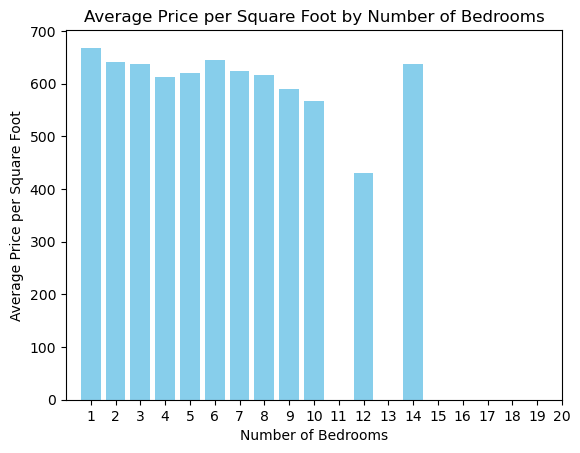

In [110]:
#bedroom visualization

average_price_by_bedrooms.columns = ['Number of Bedrooms', 'Average Price per Sq Ft']
average_price_by_bedrooms = filtered_df.groupby('bed')['price_per_sqft'].mean().reset_index()
average_price_by_bedrooms.columns = ['Number of Bedrooms', 'Average Price per Sq Ft']

plt.bar(average_price_by_bedrooms['Number of Bedrooms'], 
        average_price_by_bedrooms['Average Price per Sq Ft'], 
        color='skyblue')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price per Square Foot')
plt.title('Average Price per Square Foot by Number of Bedrooms')

# Set x-axis ticks dynamically
x_ticks = range(int(average_price_by_bedrooms['Number of Bedrooms'].min()), 
                int(average_price_by_bedrooms['Number of Bedrooms'].max()) + 1)
plt.xticks(ticks=x_ticks)
plt.xlim(0, 20)  # Adjust x-axis limit if needed
plt.show()

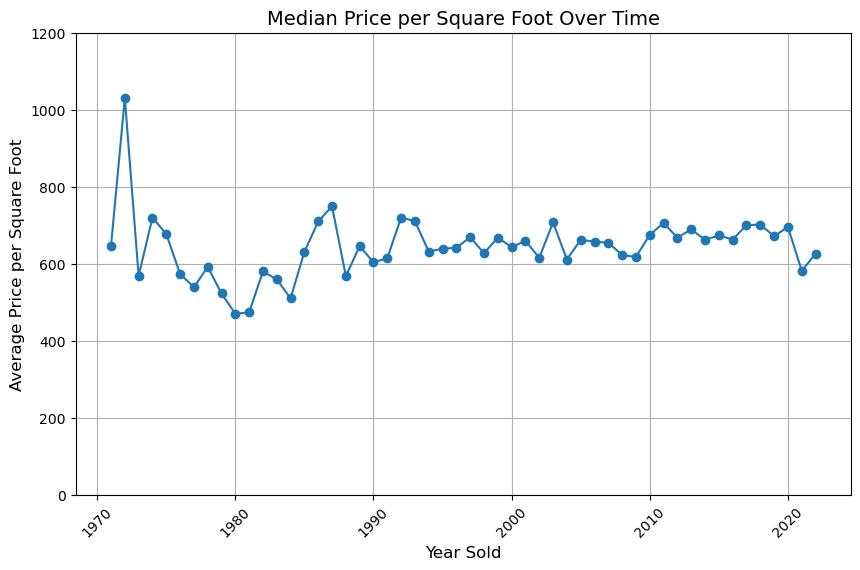

In [51]:
# Assuming filtered_df is already available and has the necessary columns

# Step 1: Calculate price per square foot

# Step 2: Group by 'year_sold' and calculate the average price per square foot
avg_price_per_sqft_by_year = filtered_df.groupby('year_sold')['price_per_sqft'].median().reset_index()

# Step 3: Plot the average price per square foot over time
plt.figure(figsize=(10,6))
plt.plot(avg_price_per_sqft_by_year['year_sold'], avg_price_per_sqft_by_year['price_per_sqft'], marker='o')

# Adding titles and labels
plt.title('Median Price per Square Foot Over Time', fontsize=14)
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Average Price per Square Foot', fontsize=12)
plt.ylim(0,1200)
# Optional: Customize the appearance
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

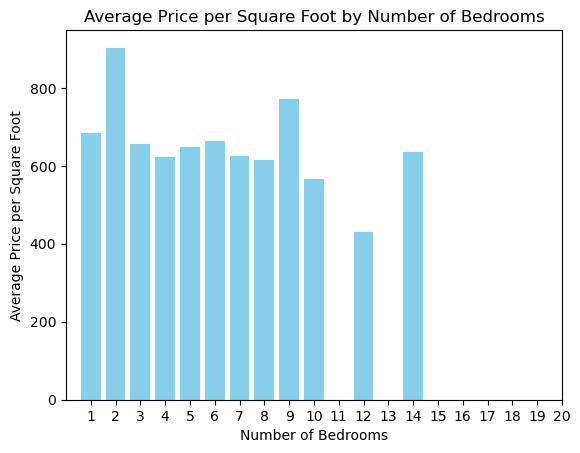

In [53]:
#bedroom visualization
average_price_by_bedrooms = filtered_df.groupby('bed')['price_per_sqft'].mean().reset_index()

# Rename columns for clarity
average_price_by_bedrooms.columns = ['Number of Bedrooms', 'Average Price per Sq Ft']


plt.bar(average_price_by_bedrooms['Number of Bedrooms'], 
        average_price_by_bedrooms['Average Price per Sq Ft'], 
        color='skyblue')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price per Square Foot')
plt.title('Average Price per Square Foot by Number of Bedrooms')

# Set x-axis ticks dynamically
x_ticks = range(int(average_price_by_bedrooms['Number of Bedrooms'].min()), 
                int(average_price_by_bedrooms['Number of Bedrooms'].max()) + 1)
plt.xticks(ticks=x_ticks)
plt.xlim(0, 20)  # Adjust x-axis limit if needed
plt.show()

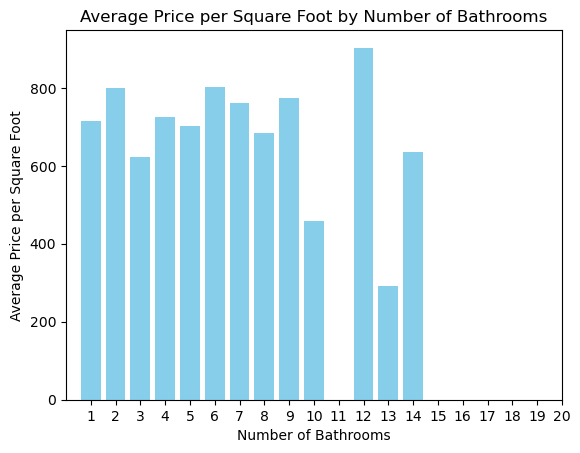

In [61]:
#Bathroom visualization
plt.bar(average_price_by_bedrooms['Number of Bathrooms'], average_price_by_bedrooms['Average Price per Sq Ft'], color='skyblue')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price per Square Foot')
plt.title('Average Price per Square Foot by Number of Bathrooms')
x_ticks = range(int(average_price_by_bedrooms['Number of Bathrooms'].min()), 
                int(average_price_by_bedrooms['Number of Bathrooms'].max()) + 1)

plt.xticks(ticks=x_ticks)  # Set the x-axis ticks
plt.xlim(0,20)
plt.show()

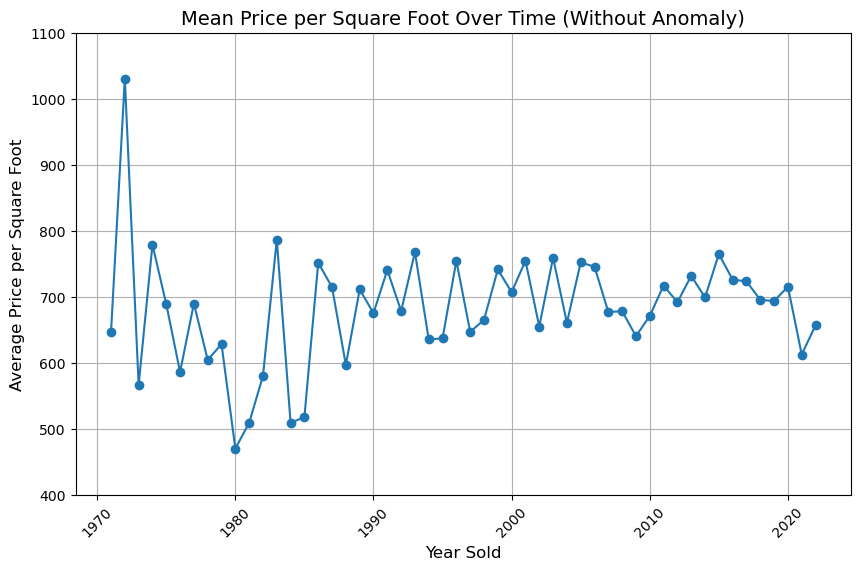

In [57]:
#mean price
anomaly_data = filtered_df[filtered_df['year_sold'] == 2018]
q1 = anomaly_data['price_per_sqft'].quantile(0.25)
q3 = anomaly_data['price_per_sqft'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers for 2018
filtered_2018 = anomaly_data[(anomaly_data['price_per_sqft'] >= lower_bound) & (anomaly_data['price_per_sqft'] <= upper_bound)]

# Remove 2018 outliers from the full dataset
filtered_df = pd.concat([filtered_df[filtered_df['year_sold'] != 2018], filtered_2018])
avg_price_per_sqft_by_year = filtered_df.groupby('year_sold')['price_per_sqft'].mean().reset_index()
# Replot the data
plt.figure(figsize=(10,6))
plt.plot(avg_price_per_sqft_by_year['year_sold'], avg_price_per_sqft_by_year['price_per_sqft'], marker='o')

# Adding titles and labels
plt.title('Mean Price per Square Foot Over Time (Without Anomaly)', fontsize=14)
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Average Price per Square Foot', fontsize=12)
plt.ylim(400, 1100)
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

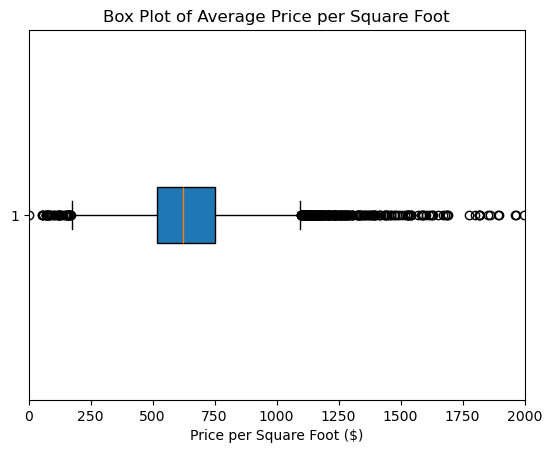

count      6497.000000
mean        732.982046
std        6092.930279
min           1.166667
25%         519.500780
50%         623.441397
75%         749.903846
max      491412.213740
Name: price_per_sqft, dtype: float64


In [24]:
plt.boxplot(filtered_df['price_per_sqft'], vert=False, patch_artist=True)
plt.xlim(0,2000)
plt.xlabel('Price per Square Foot ($)')
plt.title('Box Plot of Average Price per Square Foot')
plt.show()
summary_stats = filtered_df['price_per_sqft'].describe()

# Print the summary statistics
print(summary_stats)

C:\Users\ahjbr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ahjbr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


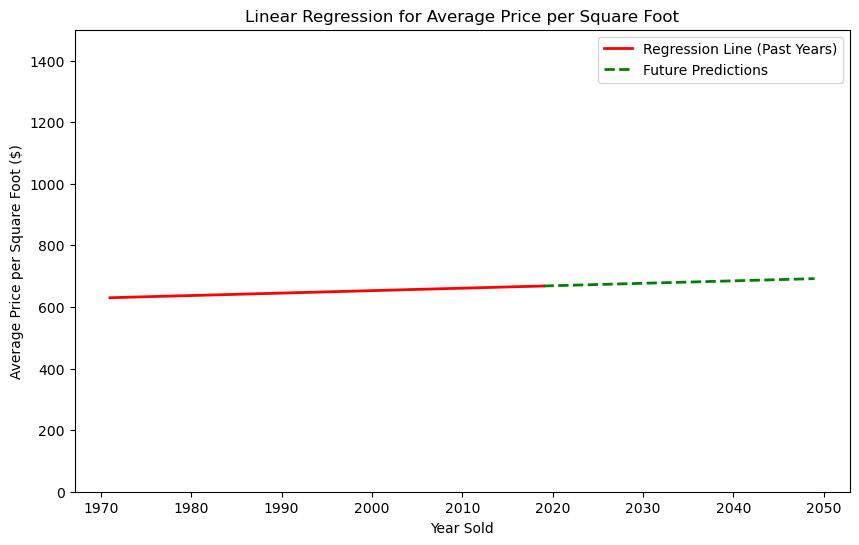